The optimization problem:
\begin{equation}
    \begin{aligned}
        &\max_{\pi}\mathbf{E}\left[\sum_{t=0}^{T-1}\gamma^t\mathcal R(s_t,a_t)\right],\\
        \text{s.t.} &\sum_{t=0}^{T-1} \gamma^t\mathcal C(s_t)=0,\\
        &{\mathbf{P}(\text{The action trajectory fails the soft constraint})\leq \delta.}
    \end{aligned}
\end{equation}
Here $\mathcal C(s)$ is the indicator function of the event $s$ is outside safe region.

The Lagrangian multiplier and minimax theorem give us:
\begin{equation}
        \min_{\substack{\lambda_1\\ \lambda_2\geq0}}\max_{\pi}\mathbf{E}\left[\sum_{t=0}^{T-1}\left[\gamma^t ({\mathcal R}(s_t,a_t) - \lambda_1\mathcal C(s_t))\right] -\lambda_2(\mathbf{P}(\text{The action trajectory fails the soft constraint})-\delta)\right].
\end{equation}

It is clear how to incorporate the hard constraint into the reward function as described above. To do the similar thing to the soft constraint, we introduce a stronger version of the soft constraint. The original constraint in (1) can be rewritten as
\begin{equation}
    \mathbf{E}\sum_{t=0}^{T-1}\mathbf{1}(\text{The action trajectory first fails the soft constraint at step $t$})\leq\delta.
\end{equation}
The stronger constraint is
\begin{equation}
    \mathbf{E}\sum_{t=0}^{T-1}\gamma^t\mathbf{1}(\text{The action trajectory first fails the soft constraint at step $t$})\leq\gamma^T\delta.
\end{equation}
Here I use $\gamma^T$ instead of $1-\gamma$ because in the example of cartpole, $1-\gamma$ is too small.

Now the Lagrangian multiplier and minimax theorem give us:
\begin{equation}
        \min_{\substack{\lambda_1\\ \lambda_2\geq0}}\max_{\pi}\mathbf{E}\left[\sum_{t=0}^{T-1}\left[\gamma^t ({\mathcal R}(s_t,a_t) - \lambda_1\mathcal C(s_t)) -\lambda_2\mathbf{1}(\text{The action trajectory fails the soft constraint at current step})\right]+\lambda_2\gamma^T\delta\right].
\end{equation}

In the current experiment, we set the safe region to be $\{s:|s|\leq0.6\}$ and the soft constraint to be that the changes of actions do not exceed $0.05$ for more than $5$ times in the episode of length $150$. 

We initialize $\lambda_i=0$, $i=1,2$, perform $100$ updates on the policy for each fixed $\lambda_1,\lambda_2$ and $40$ updates on the lambdas. 
(There is an inaccuracy with the current experiment as the update on lambdas should be in the sense of expectation but I only run evaluation once.)
Here is the result:

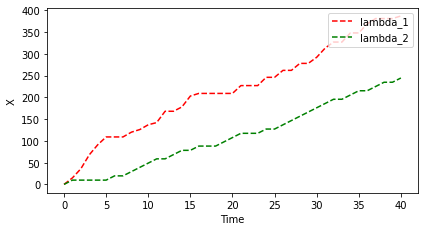

There is no convergence after $40$ steps so I used the result at the $18$th step: $\lambda_1=209, \lambda_2=88$.

I started over and performed exactly $18$ updates on the lambdas and from there I exploited the policy. After about $1300$ updates, we have the result:

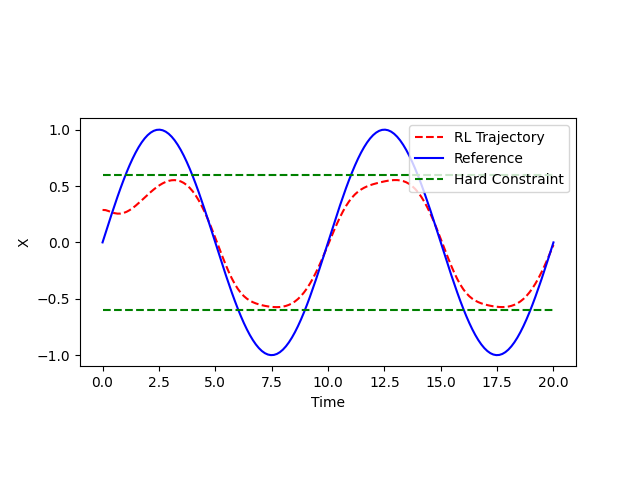.

The number of soft constraint violations is only $3$.

So far, it seems like this cannot be improved further, with the current lambdas. Moreover, the performance on the soft constraints is not stable (it makes sense since we looked at the probability?).